In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model, model_selection,preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [20]:
df=pd.read_csv('bird.csv')

In [21]:
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      413 non-null    int64  
 1   huml    413 non-null    float64
 2   humw    413 non-null    float64
 3   ulnal   413 non-null    float64
 4   ulnaw   413 non-null    float64
 5   feml    413 non-null    float64
 6   femw    413 non-null    float64
 7   tibl    413 non-null    float64
 8   tibw    413 non-null    float64
 9   tarl    413 non-null    float64
 10  tarw    413 non-null    float64
 11  type    413 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 38.8+ KB


In [22]:
df.isnull().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [23]:
X=df.drop("type", axis=1)
Y=df["type"]

In [24]:
X.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(330, 11) (330,)
(83, 11) (83,)


In [29]:
X_train.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
267,267,26.92,2.73,31.54,2.01,19.10,1.59,26.68,1.35,13.21,1.23
287,287,20.06,1.73,23.15,1.49,16.63,1.57,24.71,1.29,15.19,1.24
331,331,20.62,1.87,23.45,1.75,20.96,1.68,34.64,1.76,24.80,1.46
150,150,111.99,6.33,125.88,5.13,45.67,3.74,84.80,3.93,52.74,3.10
148,148,116.72,6.08,133.82,6.32,44.55,3.60,78.04,3.99,48.78,2.72


In [42]:
km=KMeans(n_clusters=6)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
y_predicted=km.fit_predict(X_train[['huml','humw','ulnal','ulnaw','feml','femw','tibl','tibw','tarl','tarw']])
y_predicted

array([0, 0, 0, 2, 2, 0, 5, 0, 5, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 5, 0, 4,
       4, 5, 5, 0, 2, 0, 4, 0, 0, 0, 0, 5, 2, 2, 2, 4, 0, 5, 0, 4, 2, 0,
       3, 4, 5, 2, 0, 5, 5, 3, 3, 4, 1, 5, 5, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       5, 2, 5, 0, 0, 0, 0, 5, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 5, 0, 5, 2,
       0, 0, 0, 2, 5, 3, 0, 0, 5, 0, 5, 5, 0, 2, 0, 5, 0, 0, 5, 2, 0, 5,
       5, 5, 0, 0, 0, 0, 0, 0, 5, 2, 5, 5, 5, 2, 4, 5, 2, 0, 0, 0, 0, 5,
       0, 4, 5, 2, 0, 0, 0, 4, 2, 2, 0, 0, 0, 5, 0, 2, 4, 0, 0, 4, 0, 1,
       2, 0, 0, 2, 5, 3, 4, 3, 0, 5, 4, 2, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0,
       2, 4, 5, 0, 0, 0, 0, 0, 4, 4, 0, 5, 5, 4, 0, 5, 0, 0, 0, 1, 0, 2,
       0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 2, 0, 0, 0, 4, 2, 4, 5,
       0, 2, 0, 5, 0, 0, 1, 0, 0, 5, 5, 0, 4, 2, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 4, 4, 2, 0, 0, 4, 5, 5, 2, 2, 0, 0, 2, 2, 5, 0, 4, 0, 0, 2,
       0, 0, 4, 0, 0, 0, 0, 1, 2, 0, 0, 5, 5, 0, 0, 5, 2, 5, 0, 0, 0, 0,
       2, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0,

In [54]:
X_train['cluster']=y_predicted
X_train.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,cluster
267,267,26.92,2.73,31.54,2.01,19.10,1.59,26.68,1.35,13.21,1.23,0
287,287,20.06,1.73,23.15,1.49,16.63,1.57,24.71,1.29,15.19,1.24,0
331,331,20.62,1.87,23.45,1.75,20.96,1.68,34.64,1.76,24.80,1.46,0
150,150,111.99,6.33,125.88,5.13,45.67,3.74,84.80,3.93,52.74,3.10,2
148,148,116.72,6.08,133.82,6.32,44.55,3.60,78.04,3.99,48.78,2.72,2


<function matplotlib.pyplot.legend(*args, **kwargs)>

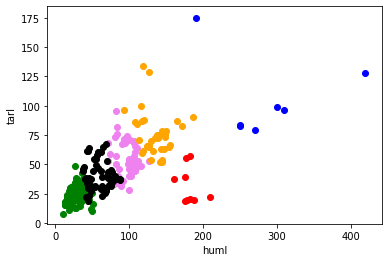

In [55]:
df1=X_train[X_train.cluster==0]
df2=X_train[X_train.cluster==1]
df3=X_train[X_train.cluster==2]
df4=X_train[X_train.cluster==3]
df5=X_train[X_train.cluster==4]
df6=X_train[X_train.cluster==5]


plt.scatter(df1.huml,df1.tarl,color='green')
plt.scatter(df2.huml,df2.tarl,color='red')
plt.scatter(df3.huml,df3.tarl,color='violet')
plt.scatter(df4.huml,df4.tarl,color='blue')
plt.scatter(df5.huml,df5.tarl,color='orange')
plt.scatter(df6.huml,df6.tarl,color='black')


plt.xlabel('huml')
plt.ylabel('tarl')
plt.legend


In [40]:
X_test

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
190,190,32.34,3.17,29.05,2.36,39.64,2.70,55.36,2.51,37.08,2.22
376,376,23.52,2.16,29.33,1.72,20.59,1.49,32.45,1.13,19.33,1.00
329,329,21.85,2.06,25.90,1.75,20.86,1.72,34.26,1.43,23.25,1.18
236,236,116.85,7.43,134.80,6.19,73.51,6.10,112.66,5.94,61.25,6.90
290,290,30.28,2.89,35.37,2.15,31.09,2.51,53.36,2.31,39.52,1.69
...,...,...,...,...,...,...,...,...,...,...,...
322,322,27.90,2.51,31.56,2.07,24.08,2.28,45.90,2.09,34.98,1.60
92,92,69.37,4.07,67.08,3.61,28.50,2.26,53.42,2.03,31.08,1.99
215,215,89.05,6.28,102.09,5.37,70.32,5.90,96.12,5.70,75.05,5.12
125,125,30.99,2.09,26.14,1.82,32.83,2.09,50.67,1.98,30.80,1.95


# km1=KMeans(n_clusters=6)
y_predicted1=km1.fit_predict(X_test[['huml','humw','ulnal','ulnaw','feml','femw','tibl','tibw','tarl','tarw']])
y_predicted1

In [75]:
np.array(km1.cluster_centers_)


array([[157.        ,   9.        , 192.        ,   7.02      ,
         85.6       ,   6.44      , 227.        ,   6.84      ,
        175.        ,   6.77      ],
       [ 77.12555556,   4.54833333,  75.56777778,   3.96944444,
         36.33722222,   2.91111111,  68.18888889,   3.00555556,
         39.17833333,   2.825     ],
       [ 27.9925    ,   2.48625   ,  30.78354167,   2.15020833,
         24.001875  ,   1.91      ,  39.07666667,   1.74541667,
         25.28395833,   1.69375   ],
       [172.75      ,   9.955     , 207.75      ,   7.79      ,
         53.76      ,   6.7025    ,  75.6175    ,   5.215     ,
         34.0175    ,   7.4725    ],
       [272.        ,  14.86      , 320.        ,  10.42      ,
         91.6       ,   9.71      , 132.        ,  10.23      ,
         81.77      ,   8.91      ],
       [111.06727273,   7.25      , 122.76181818,   5.82454545,
         72.63636364,   6.33454545, 114.35      ,   6.14272727,
         74.34727273,   5.64818182]])

In [61]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Y_test= label_encoder.fit_transform(Y_test) 
  
Y_test

array([4, 2, 2, 1, 2, 1, 2, 2, 3, 1, 3, 3, 5, 3, 3, 2, 2, 0, 3, 1, 2, 1,
       2, 5, 5, 0, 3, 5, 5, 3, 2, 2, 3, 2, 3, 1, 3, 5, 5, 3, 3, 2, 2, 3,
       2, 4, 4, 3, 3, 5, 5, 3, 5, 2, 2, 0, 1, 2, 0, 2, 5, 0, 2, 0, 3, 2,
       0, 2, 1, 3, 5, 2, 2, 3, 1, 2, 0, 3, 2, 3, 1, 5, 3], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

exp=Y_test
pred=y_predicted1

print(classification_report(exp,pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        10
           2       0.54      1.00      0.70        26
           3       1.00      0.17      0.30        23
           4       0.00      0.00      0.00         3
           5       0.09      0.08      0.08        13

    accuracy                           0.37        83
   macro avg       0.27      0.21      0.18        83
weighted avg       0.46      0.37      0.32        83



In [70]:
print(classification_report(exp,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        10
           2       0.54      1.00      0.70        26
           3       1.00      0.17      0.30        23
           4       0.00      0.00      0.00         3
           5       0.09      0.08      0.08        13

    accuracy                           0.37        83
   macro avg       0.27      0.21      0.18        83
weighted avg       0.46      0.37      0.32        83



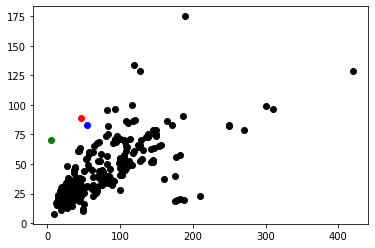

In [88]:
#Implementation using own function

#Initializing the centroids dictionary which stores the cluster number and the centroid generarted randomly
k=3
centroids = {
    i+1 : [np.random.randint(0,100) , np.random.randint(0,100)]
    for i in range(k)
}

#Plotting data before clustering it.
import matplotlib.pyplot as plt 

x = X_train["huml"]
y= X_train["tarl"]
colmap = {
    1 : 'r',
    2 : 'g',
    3 : 'b'
}

plt.scatter(x,y,color = "k")
for i in centroids.keys():
    plt.scatter(*centroids[i] , color = colmap[i])
plt.show()

In [89]:
def assignment(X_train,centroids):
    for i in centroids.keys():
        X_train["distance_from_{}".format(i)] = (
            np.sqrt(
                (x - centroids[i][0]) **2
                +
                (y - centroids[i][1]) **2
            )
        )
        
        centroid_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]

        X_train["closest"] = X_train.loc[: , centroid_distance_cols].idxmin(axis = 1)
        X_train["closest"] = X_train["closest"].map(
            lambda x: int(x.lstrip("distance_from_"))
        )
        X_train["color"] = X_train["closest"].map(lambda x: colmap[x])
    return X_train

#Function to update the centroids of the cluster
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(X_train[X_train["closest"] == i]["huml"])
        centroids[i][1] = np.mean(X_train[X_train["closest"] == i]["tarl"])
    return k

In [90]:
def assignment(X_train,centroids):
    for i in centroids.keys():
        X_train["distance_from_{}".format(i)] = (
            np.sqrt(
                (x - centroids[i][0]) **2
                +
                (y - centroids[i][1]) **2
            )
        )
        
        centroid_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]

        X_train["closest"] = X_train.loc[: , centroid_distance_cols].idxmin(axis = 1)
        X_train["closest"] = X_train["closest"].map(
            lambda x: int(x.lstrip("distance_from_"))
        )
        X_train["color"] = X_train["closest"].map(lambda x: colmap[x])
    return X_train

#Function to update the centroids of the cluster
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(X_train[X_train["closest"] == i]["huml"])
        centroids[i][1] = np.mean(X_train[X_train["closest"] == i]["tarl"])
    return k
X_train= assignment(X_train,centroids)
#Driver function to find centroids till they are exact same after a iteration
while True:
    closest_centroids = X_train["closest"].copy(deep=True)
    centroids = update(centroids)
    X_train = assignment(X_train,centroids)
    if closest_centroids.equals(X_train["closest"]):
        break


#PLotting the clusters formed
plt.scatter(X_train["huml"],X_train["tarl"],color = X_train["color"],alpha=0.5)

for i in centroids.keys():
    plt.scatter(*centroids[i] , color=colmap[i])
plt.show()

KeyError: 'closest'

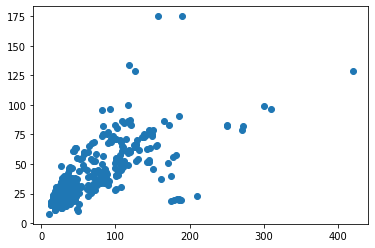

In [32]:
plt.scatter(df['huml'],df['tarl'])

0      SW
1      SW
2      SW
3      SW
4      SW
       ..
408    SO
409    SO
410    SO
411    SO
412    SO
Name: type, Length: 413, dtype: object